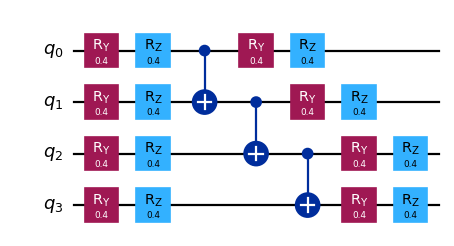

In [1]:
from qiskit.circuit.library import EfficientSU2

circuit = EfficientSU2(num_qubits=4, entanglement="linear", reps=1).decompose()
circuit.assign_parameters([0.4] * len(circuit.parameters), inplace=True)
circuit.draw("mpl", scale=0.8)

In [2]:
from benchmark.ckt import run_ckt, cut_ckt, run_qtpu

qpd_circuit = cut_ckt(circuit, 2)
qpd_circuit.draw()

/workspaces/qvm/.venv/lib/python3.12/site-packages/cotengra/hyperoptimizers/hyper.py:33: UserWarning: Couldn't import `kahypar` - skipping from default hyper optimizer and using basic `labels` method instead.
  warnings.warn(


Found solution using 1 cuts with a sampling overhead of 9.0.


┌─────────┐┌─────────┐     ┌─────────┐┌─────────┐                      
q_0: ┤ Ry(0.4) ├┤ Rz(0.4) ├──■──┤ Ry(0.4) ├┤ Rz(0.4) ├──────────────────────
     ├─────────┤├─────────┤┌─┴─┐├─────────┤├─────────┤┌─────────┐           
q_1: ┤ Ry(0.4) ├┤ Rz(0.4) ├┤ X ├┤0        ├┤ Ry(0.4) ├┤ Rz(0.4) ├───────────
     ├─────────┤├─────────┤└───┘│  cut_cx │└─────────┘├─────────┤┌─────────┐
q_2: ┤ Ry(0.4) ├┤ Rz(0.4) ├─────┤1        ├─────■─────┤ Ry(0.4) ├┤ Rz(0.4) ├
     ├─────────┤├─────────┤     └─────────┘   ┌─┴─┐   ├─────────┤├─────────┤
q_3: ┤ Ry(0.4) ├┤ Rz(0.4) ├───────────────────┤ X ├───┤ Ry(0.4) ├┤ Rz(0.4) ├
     └─────────┘└─────────┘                   └───┘   └─────────┘└─────────┘

In [3]:
from qiskit_aer import AerSimulator
from qiskit_aer.primitives import Sampler
# from qiskit.primitives import BackendSampler, Sampler
from circuit_knitting.utils.simulation import ExactSampler


res = run_ckt(qpd_circuit, Sampler(), num_samples=1e20)

In [4]:
res

(0.5508467300000001,
 {'ckt_preparation': 0.003802084000199102,
  'ckt_runtime': 0.25099754199618474,
  'ckt_postprocessing': 0.00096750000375323})

In [11]:
# qpd_circuit.measure_all()
print(qpd_circuit)
from qtpu.evaluate import evaluate_sampler

res = run_qtpu(qpd_circuit, eval_fn=evaluate_sampler(Sampler(), return_quasi_distr=True))

        ┌─────────┐┌─────────┐     ┌─────────┐┌─────────┐                      »
   q_0: ┤ Ry(0.4) ├┤ Rz(0.4) ├──■──┤ Ry(0.4) ├┤ Rz(0.4) ├──────────────────────»
        ├─────────┤├─────────┤┌─┴─┐├─────────┤├─────────┤┌─────────┐           »
   q_1: ┤ Ry(0.4) ├┤ Rz(0.4) ├┤ X ├┤0        ├┤ Ry(0.4) ├┤ Rz(0.4) ├───────────»
        ├─────────┤├─────────┤└───┘│  cut_cx │└─────────┘├─────────┤┌─────────┐»
   q_2: ┤ Ry(0.4) ├┤ Rz(0.4) ├─────┤1        ├─────■─────┤ Ry(0.4) ├┤ Rz(0.4) ├»
        ├─────────┤├─────────┤     └─────────┘   ┌─┴─┐   ├─────────┤├─────────┤»
   q_3: ┤ Ry(0.4) ├┤ Rz(0.4) ├───────────────────┤ X ├───┤ Ry(0.4) ├┤ Rz(0.4) ├»
        └─────────┘└─────────┘                   └───┘   └─────────┘└─────────┘»
meas: 4/═══════════════════════════════════════════════════════════════════════»
                                                                               »
«         ░ ┌─┐         
«   q_0: ─░─┤M├─────────
«         ░ └╥┘┌─┐      
«   q_1: ─░──╫─┤M├──────
«        

In [12]:
res

({5: 0.0013034649999999997,
  1: 0.032768019999999995,
  13: 0.0010954450000000004,
  9: 0.0060471100000000005,
  7: 0.0004900550000000001,
  3: 0.005635720000000004,
  15: 0.051649595000000006,
  11: 0.00010016999999999969,
  6: 0.00126581,
  2: 0.03526628,
  14: 0.03759177500000001,
  10: 0.0017244349999999999,
  4: 0.02484991,
  0: 0.6532582200000001,
  12: 0.04679350500000007,
  8: 0.094860485},
 {'qtpu_preparation': 0.017928582994500175,
  'qtpu_runtime': 0.14964258299733046,
  'qtpu_postprocessing': 0.00011349999840604141})

In [13]:
circuit.measure_all()
Sampler().run(circuit).result().quasi_dists

[{13: 0.0009765625, 4: 0.0205078125, 1: 0.029296875, 15: 0.052734375, 3: 0.0048828125, 5: 0.001953125, 14: 0.041015625, 2: 0.0419921875, 0: 0.666015625, 9: 0.0087890625, 12: 0.041015625, 8: 0.0908203125}]